### This notebook shows how to query data on Interest Rates of Banks and Finance Companies, Monthly via the [Monetary Authority of Singapore (MAS) API](https://secure.mas.gov.sg/api/APIDescPage.aspx?resource_id=5f2b18a8-0883-4769-a635-879c63d3caac).

In [23]:
import pandas as pd

In [2]:
import urllib.request

In [5]:
user_agent = 'Mozilla/5.0 (Windows; U; Windows NT 5.1; en-US; rv:1.9.0.7) Gecko/2009021910 Firefox/3.0.7'

headers={'User-Agent':user_agent,} 

In [6]:
url = 'https://eservices.mas.gov.sg/api/action/datastore/search.json?resource_id=5f2b18a8-0883-4769-a635-879c63d3caac'

request=urllib.request.Request(url,None,headers) #The assembled request
response = urllib.request.urlopen(request)
data = response.read() # The data u need

#with urllib.request.urlopen (url) as req:
#    print (req.read())

In [0]:
data

In [11]:
type(data)

bytes

In [14]:
import json

In [15]:
data_json = json.loads(data)

In [0]:
data_json

In [18]:
type(data_json)

dict

In [20]:
data_json.keys()

dict_keys(['success', 'result'])

In [24]:
df = pd.json_normalize(data_json['result']['records'])

In [25]:
df

,end_of_month,prime_lending_rate,banks_fixed_deposits_3m,banks_fixed_deposits_6m,banks_fixed_deposits_12m,banks_savings_deposits,fc_hire_purchase_motor_3y,fc_housing_loans_15y,fc_fixed_deposits_3m,fc_fixed_deposits_6m,fc_fixed_deposits_12m,fc_savings_deposits,timestamp
0,1983-01,9.53,6.75,6.80,7.13,6.50,12.67,12.42,7.15,7.30,7.70,7.21,1681685795
1,1983-02,9.25,6.40,6.70,6.93,6.40,12.58,12.21,6.70,7.03,7.33,7.08,1681685795
2,1983-03,9.10,6.18,6.48,6.83,6.30,12.36,11.97,6.48,6.78,7.18,7.00,1681685795
3,1983-04,9.03,6.10,6.35,6.73,6.15,12.19,11.92,6.38,6.65,7.13,7.00,1681685795
4,1983-05,9.03,6.10,6.35,6.73,6.13,12.14,11.84,6.50,6.75,7.18,7.00,1681685795
...,...,...,...,...,...,...,...,...,...,...,...,...,...
477,2022-10,None,None,None,None,None,5.49,None,0.65,0.15,1.17,0.13,1681685795
478,2022-11,None,None,None,None,None,5.49,None,1.13,0.15,1.47,0.13,1681685795
479,2022-12,None,None,None,None,None,5.49,None,1.23,0.15,1.48,0.13,1681685795
480,2023-01,None,None,None,None,None,5.49,None,1.23,0.15,1.48,0.13,1681685795


In [27]:
list(df)

['end_of_month',
 'prime_lending_rate',
 'banks_fixed_deposits_3m',
 'banks_fixed_deposits_6m',
 'banks_fixed_deposits_12m',
 'banks_savings_deposits',
 'fc_hire_purchase_motor_3y',
 'fc_housing_loans_15y',
 'fc_fixed_deposits_3m',
 'fc_fixed_deposits_6m',
 'fc_fixed_deposits_12m',
 'fc_savings_deposits',
 'timestamp']

In [31]:
df.dtypes

end_of_month                 object
prime_lending_rate           object
banks_fixed_deposits_3m      object
banks_fixed_deposits_6m      object
banks_fixed_deposits_12m     object
banks_savings_deposits       object
fc_hire_purchase_motor_3y    object
fc_housing_loans_15y         object
fc_fixed_deposits_3m         object
fc_fixed_deposits_6m         object
fc_fixed_deposits_12m        object
fc_savings_deposits          object
timestamp                    object
dtype: object

In [32]:
for i in ['fc_fixed_deposits_3m','fc_fixed_deposits_6m','fc_fixed_deposits_12m']:
    df[i] = df[i].astype(float)

In [40]:
df['end_of_month'] = pd.to_datetime(df['end_of_month'], format='%Y-%m', errors='coerce')

In [41]:
df.dtypes

end_of_month                 datetime64[ns]
prime_lending_rate                   object
banks_fixed_deposits_3m              object
banks_fixed_deposits_6m              object
banks_fixed_deposits_12m             object
banks_savings_deposits               object
fc_hire_purchase_motor_3y            object
fc_housing_loans_15y                 object
fc_fixed_deposits_3m                float64
fc_fixed_deposits_6m                float64
fc_fixed_deposits_12m               float64
fc_savings_deposits                  object
timestamp                            object
dtype: object

In [42]:
df.head()

,end_of_month,prime_lending_rate,banks_fixed_deposits_3m,banks_fixed_deposits_6m,banks_fixed_deposits_12m,banks_savings_deposits,fc_hire_purchase_motor_3y,fc_housing_loans_15y,fc_fixed_deposits_3m,fc_fixed_deposits_6m,fc_fixed_deposits_12m,fc_savings_deposits,timestamp
0,1983-01-01,9.53,6.75,6.80,7.13,6.50,12.67,12.42,7.15,7.30,7.70,7.21,1681685795
1,1983-02-01,9.25,6.40,6.70,6.93,6.40,12.58,12.21,6.70,7.03,7.33,7.08,1681685795
2,1983-03-01,9.10,6.18,6.48,6.83,6.30,12.36,11.97,6.48,6.78,7.18,7.00,1681685795
3,1983-04-01,9.03,6.10,6.35,6.73,6.15,12.19,11.92,6.38,6.65,7.13,7.00,1681685795
4,1983-05-01,9.03,6.10,6.35,6.73,6.13,12.14,11.84,6.50,6.75,7.18,7.00,1681685795


In [29]:
import matplotlib.pyplot as plt

In [55]:
import matplotlib.dates as mdates

In [66]:
plt.rcParams['font.size'] = 14

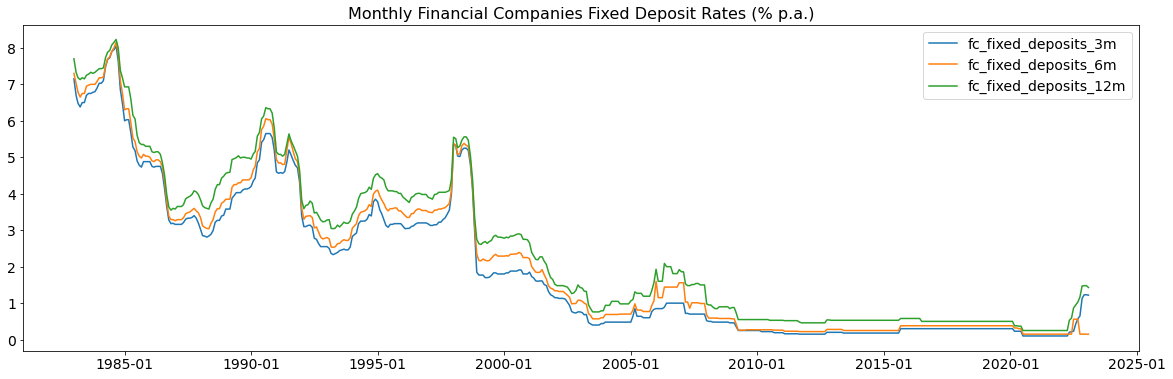

In [67]:
fig, ax = plt.subplots(figsize=(20,6))
plt.plot(df['end_of_month'], df['fc_fixed_deposits_3m'], label = "fc_fixed_deposits_3m")
plt.plot(df['end_of_month'], df['fc_fixed_deposits_6m'], label = "fc_fixed_deposits_6m")
plt.plot(df['end_of_month'], df['fc_fixed_deposits_12m'], label = "fc_fixed_deposits_12m")

# Text in the x-axis will be displayed in 'YYYY-mm' format.
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.title('Monthly Financial Companies Fixed Deposit Rates (% p.a.)')
plt.legend()
plt.show()

In [75]:
df_fcrates = df[['end_of_month','fc_fixed_deposits_3m','fc_fixed_deposits_6m','fc_fixed_deposits_12m']].melt(id_vars=["end_of_month"], 
        var_name="Rate", 
        value_name="Value")

In [68]:
import plotly.express as px

/data/dataiku/dss_data/code-envs/python/py_36_hx_general/lib/python3.6/site-packages/attr/__init__.py:32: DeprecationWarning:

Running attrs on Python 3.6 is deprecated & we intend to drop support soon. If that's a problem for you, please let us know why & we MAY re-evaluate: <https://github.com/python-attrs/attrs/pull/993>



In [81]:
fig1 = px.line(df_fcrates, x='end_of_month', y="Value",color='Rate')
fig1.update_layout(title=dict(text='Monthly Financial Companies Fixed Deposit Rates (% p.a.)', font=dict(size=14)))
fig1.update_xaxes(title_text='')
fig1.update_yaxes(title_text='')
fig1.show()

Resources:   
https://stackoverflow.com/questions/13303449/urllib2-httperror-http-error-403-forbidden